# Домашняя работа 1


In [ ]:
!pip install torch torchvision torchaudio torch-geometric ogb --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
from ogb.nodeproppred import NodePropPredDataset
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import random



1. Загрузка данных

In [ ]:
dataset = NodePropPredDataset(name='ogbn-arxiv', root='data')
graph, labels = dataset[0]

print("Количество узлов:", graph["num_nodes"])
print("Количество рёбер:", graph["edge_index"].shape[1])


Downloaded 0.08 GB: 100%|██████████| 81/81 [00:04<00:00, 18.43it/s]


Extracting data/arxiv.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<00:00, 11781.75it/s]

Saving...


Количество узлов: 169343
Количество рёбер: 1166243


In [ ]:
edge_index = graph["edge_index"].T  # np.array (1.1M × 2)
G = nx.DiGraph()
G.add_edges_from(edge_index)
G = G.to_undirected()

Визуализируйте граф на семпле из 1000 узлов

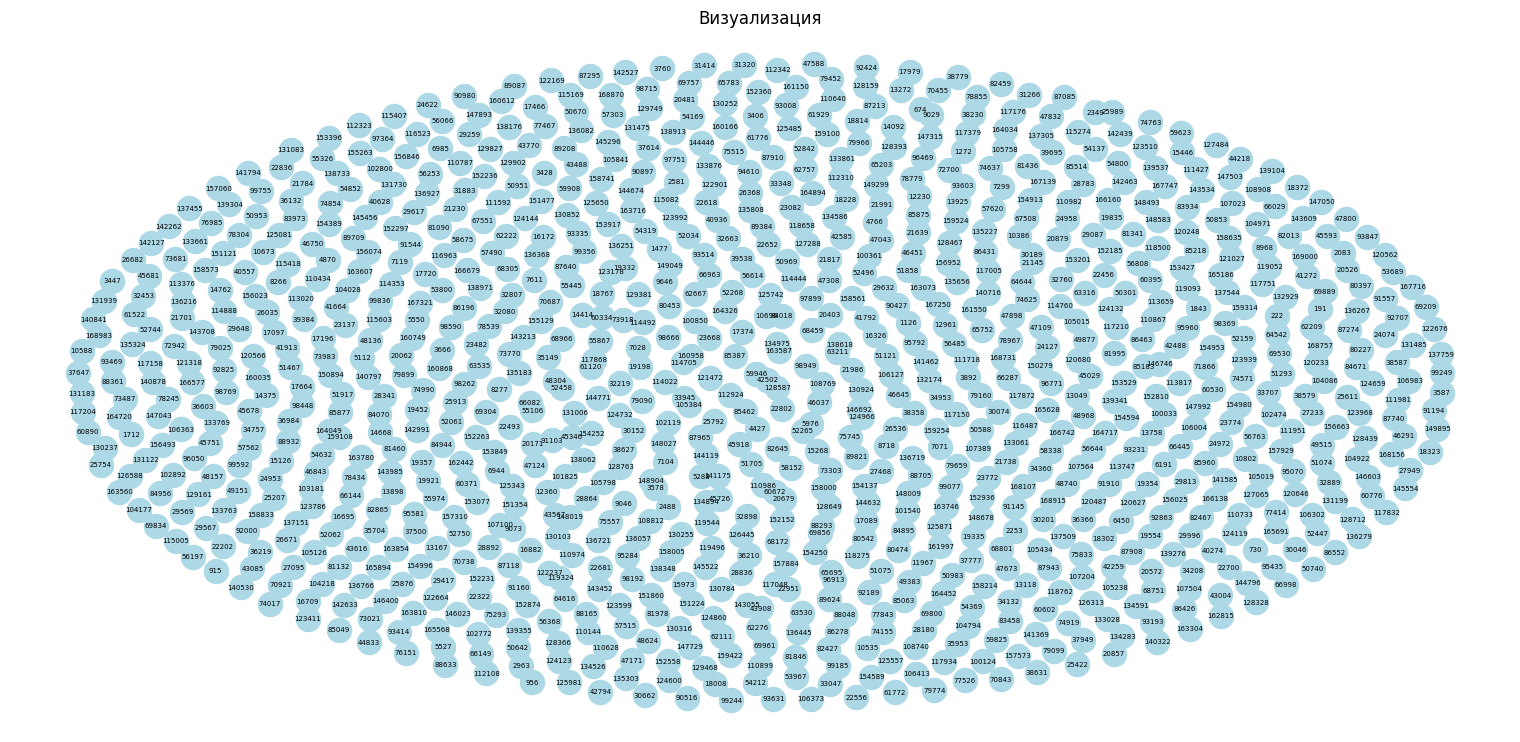

In [ ]:
# TODO: визуализация
sample_nodes = random.sample(list(G.nodes()), 1000)
G_sample = G.subgraph(sample_nodes)

pos = nx.spring_layout(G_sample, k=None, iterations=50, seed=42, dim=2, weight='weight')

plt.figure(figsize=(15, 7))
nx.draw(G_sample, pos, node_size=300, node_color='lightblue', with_labels=True, font_size=5)
plt.title("Визуализация")
plt.show()

### Предварительный анализ

Произведем предварительный анализ графа

In [ ]:
sample_nodes = random.sample(list(G.nodes()), 10000)
G_s = G.subgraph(sample_nodes)

# TODO: средняя степень
avg_degree = sum(dict(G_s.degree()).values()) / G_s.number_of_nodes()

# TODO: плотность графа
density = nx.density(G_s)

m_c = max(nx.connected_components(G_s), key=len)
G_m = G.subgraph(m_c)

# TODO: диаметер графа
diameter = nx.diameter(G_m)  # TODO

# TODO: радиус графа
radius = nx.radius(G_m)  # TODO

print(f"Средняя степень: {avg_degree:.2f}")
print(f"Плотность: {density:.6f}")
print(f"Диаметер графа: {diameter:.4f}")
print(f"Радиус графа: {radius:.4f}")

Средняя степень: 0.80
Плотность: 0.000080
Диаметер графа: 22.0000
Радиус графа: 12.0000


### Анализ на центральность

Найдите узел с максимальной центральностью

In [ ]:
# TODO: Вычисление центральности по степени (degree centrality)
degree_centrality = nx.degree_centrality(G_s)
print("Центральность по степени:", degree_centrality)

# TODO: Вычисление центральности по близости (closeness centrality)
closeness_centrality = nx.closeness_centrality(G_s)
print("Центральность по близости:", closeness_centrality)

# TODO: Вычисление центральности по междуузловой значимости (betweenness centrality)
betweenness_centrality = nx.betweenness_centrality(G_s)
print("Центральность по междуузловой значимости:", betweenness_centrality)


Центральность по степени: {np.int64(3): 0.0, np.int64(65550): 0.0, np.int64(98318): 0.0, np.int64(32797): 0.00010001000100010001, np.int64(33): 0.0, np.int64(98339): 0.0, np.int64(98343): 0.0, np.int64(98346): 0.00020002000200020003, np.int64(98347): 0.0, np.int64(43): 0.00020002000200020003, np.int64(98350): 0.00030003000300030005, np.int64(163890): 0.0, np.int64(65588): 0.0, np.int64(98365): 0.0, np.int64(131136): 0.0, np.int64(131137): 0.0, np.int64(32835): 0.0, np.int64(131143): 0.0, np.int64(72): 0.0, np.int64(98378): 0.00020002000200020003, np.int64(131147): 0.00010001000100010001, np.int64(163920): 0.0, np.int64(131153): 0.00010001000100010001, np.int64(163921): 0.00030003000300030005, np.int64(163922): 0.0, np.int64(98391): 0.0, np.int64(65626): 0.0, np.int64(65630): 0.0, np.int64(98400): 0.0, np.int64(163940): 0.00020002000200020003, np.int64(131175): 0.0, np.int64(131178): 0.0, np.int64(98416): 0.0, np.int64(98427): 0.00010001000100010001, np.int64(65662): 0.00010001000100010

Анализ кластеров

In [ ]:
# TODO: Вычислите средний кластерный коэффициент графа
global_cluster_coeff = nx.average_clustering(G)
print("Cредний кластерный коэффициент графа:", global_cluster_coeff)


Cредний кластерный коэффициент графа: 0.22612914062470948


In [ ]:
# TODO: Вычислите коэффициент транзитивности
transitivity_coeff = nx.transitivity(G)
print("Коэффициент транзитивности графа:", transitivity_coeff)


Коэффициент транзитивности графа: 0.01620149151351999


### Поиск сообществ

Реализуйте 2 метода поиска сообществ:
1. С помощью готовой реализации в библиотеке NetworkX
2. Реализуйте самостоятельно класс с алгоритмом Clauset–Newman–Moore

Сравните полученные результаты

Алгоритм Clauset–Newman–Moore (CNM)

---

**1. Начальное состояние**
- Каждая вершина — отдельное сообщество.  
- Вычисляем степени вершин и матрицу смежности.

---

**2. Вычисляем для всех пар сообществ** $(r, s)$, между которыми есть хотя бы одно ребро:

$$
\Delta Q_{rs} = 2 \, (e_{rs} - a_r a_s)
$$

где:  

- $e_{rs}$ — доля рёбер между сообществами *r* и *s*, делённая на $2m$;  
- $a_r = \sum_t e_{rt}$ — доля концов рёбер, инцидентных *r*.

---

**2.1. Доля концов рёбер, инцидентных вершинам из $r$**

Это часть всех концов рёбер в графе, которые принадлежат вершинам, входящим в сообщество $r$.

Эта величина обозначается как $a_r$ и вычисляется по формуле:

$$
a_r = \frac{1}{2m} \sum_{i \in r} k_i
$$

где:  

- $k_i$ — степень вершины $i$ (сколько у неё рёбер);  
- $m$ — общее число рёбер в графе;  
- $2m$ — общее количество **концов рёбер** (так как каждое ребро имеет два конца).

---

**3. Выбираем пару $(r, s)$** с максимальным $\Delta Q$ и объединяем их.

---

**4. Обновляем:**
- значения $e_{rt}, a_r$;  
- новую модульность:  
  $$
  Q \leftarrow Q + \Delta Q
  $$

---

**5. Повторяем**, пока $\Delta Q > 0$.

---

**6. Выбираем состояние с максимальным $Q$** как оптимальное разбиение.


Описание алгоритма - https://arxiv.org/pdf/cond-mat/0408187

In [ ]:
class CNM:
    """
    Алгоритм Clauset–Newman–Moore для обнаружения сообществ.
    TODO: Заполните пропущенные участки кода.
    """

    def __init__(self, edges):
        self.graph = defaultdict(dict)
        for u, v, w in edges:
            if u == v: continue
            self.graph[u][v] = self.graph[u].get(v, 0) + w
            self.graph[v][u] = self.graph[v].get(u, 0) + w
        self.nodes = list(self.graph.keys())
        self.m = sum(sum(self.graph[u].values()) for u in self.nodes) / 2
        self.deg = {u: sum(self.graph[u].values()) for u in self.nodes}

    def fit(self, verbose=False):
        communities = {u: {u} for u in self.nodes}
        comm_id = {u: u for u in self.nodes}
        m2 = 2 * self.m
        a = {u: self.deg[u] / m2 for u in self.nodes}

        # TODO 0: Доля рёбер между сообществами

        e = {}

        for u in self.nodes:
            for v in self.graph[u]:
                r = comm_id[u]
                s = comm_id[v]

                if r == s:
                    continue

                if r not in e:
                    e[r] = {}
                if s not in e[r]:
                    e[r][s] = 0

                e[r][s] += self.graph[u][v] / m2

        # Начальная модульность
        Q = -sum(a[c] ** 2 for c in a)

        # Основной цикл
        while True:
            best_dQ = 0
            best_pair = None

            # TODO 1: Найти пару (r, s) с максимальным ΔQ
            for r in e:
                for s in e[r]:
                    dQ = 2 * (e[r][s] - a[r] * a[s])

                    if dQ > best_dQ:
                        best_dQ = dQ
                        best_pair = (r, s)

            # TODO 2: Условие выхода
            if best_dQ == 0:  # TODO
                break

            r, s = best_pair
            if verbose:
                print(f"Объединяем {r}, {s} с ΔQ={best_dQ:.6f}")

            # TODO 3: Объединение сообществ
            communities[r].update(communities[s])
            communities[s] = {}

            for node in communities[r]:
                comm_id[node] = r

            # TODO 4: Обновление a, e, Q
            a[r] += a[s]
            a[s] = 0

            for x in e[s]:
                if x != r:
                    if x not in e[r]:
                        e[r][x] = 0
                    if r not in e[x]:
                        e[x][r] = 0
                    e[r][x] += e[s][x]
                    e[x][r] += e[x][s]

            del e[s]
            del e[r][s]

            for x in list(e.keys()):
                if s in e[x]:
                    del e[x][s]

            Q += best_dQ

        final_comms = [c for c in communities.values() if c]
        return final_comms, Q


In [ ]:
edges = list(G_s.edges(data='weight', default=1))
model = CNM(edges)
comms, Q_my = model.fit(verbose=True)

# NetworkX эталон
nx_comms = list(greedy_modularity_communities(G_s))
Q_nx = modularity(G_s, nx_comms)

print("\n=== Сравнение ===")
print("CNM (наш)  Q =", round(Q_my, 5))
print("NetworkX    Q =", round(Q_nx, 5))
print("Количество сообществ:", len(comms))


Объединяем 32797, 168510 с ΔQ=0.000250
Объединяем 131147, 150554 с ΔQ=0.000250
Объединяем 131153, 133887 с ΔQ=0.000250
Объединяем 98427, 129162 с ΔQ=0.000250
Объединяем 65662, 143569 с ΔQ=0.000250
Объединяем 147, 5544 с ΔQ=0.000250
Объединяем 65689, 68236 с ΔQ=0.000250
Объединяем 65697, 97084 с ΔQ=0.000250
Объединяем 98492, 100296 с ΔQ=0.000250
Объединяем 98499, 53374 с ΔQ=0.000250
Объединяем 98500, 125693 с ΔQ=0.000250
Объединяем 202, 140473 с ΔQ=0.000250
Объединяем 32974, 95710 с ΔQ=0.000250
Объединяем 65768, 111404 с ΔQ=0.000250
Объединяем 164093, 132459 с ΔQ=0.000250
Объединяем 296, 90361 с ΔQ=0.000250
Объединяем 131411, 141481 с ΔQ=0.000250
Объединяем 98685, 110251 с ΔQ=0.000250
Объединяем 98736, 49127 с ΔQ=0.000250
Объединяем 470, 63490 с ΔQ=0.000250
Объединяем 164412, 87614 с ΔQ=0.000250
Объединяем 66140, 51036 с ΔQ=0.000250
Объединяем 98955, 113917 с ΔQ=0.000250
Объединяем 99079, 167485 с ΔQ=0.000250
Объединяем 131850, 8605 с ΔQ=0.000250
Объединяем 66353, 144044 с ΔQ=0.000250
О

Визуализация результатов

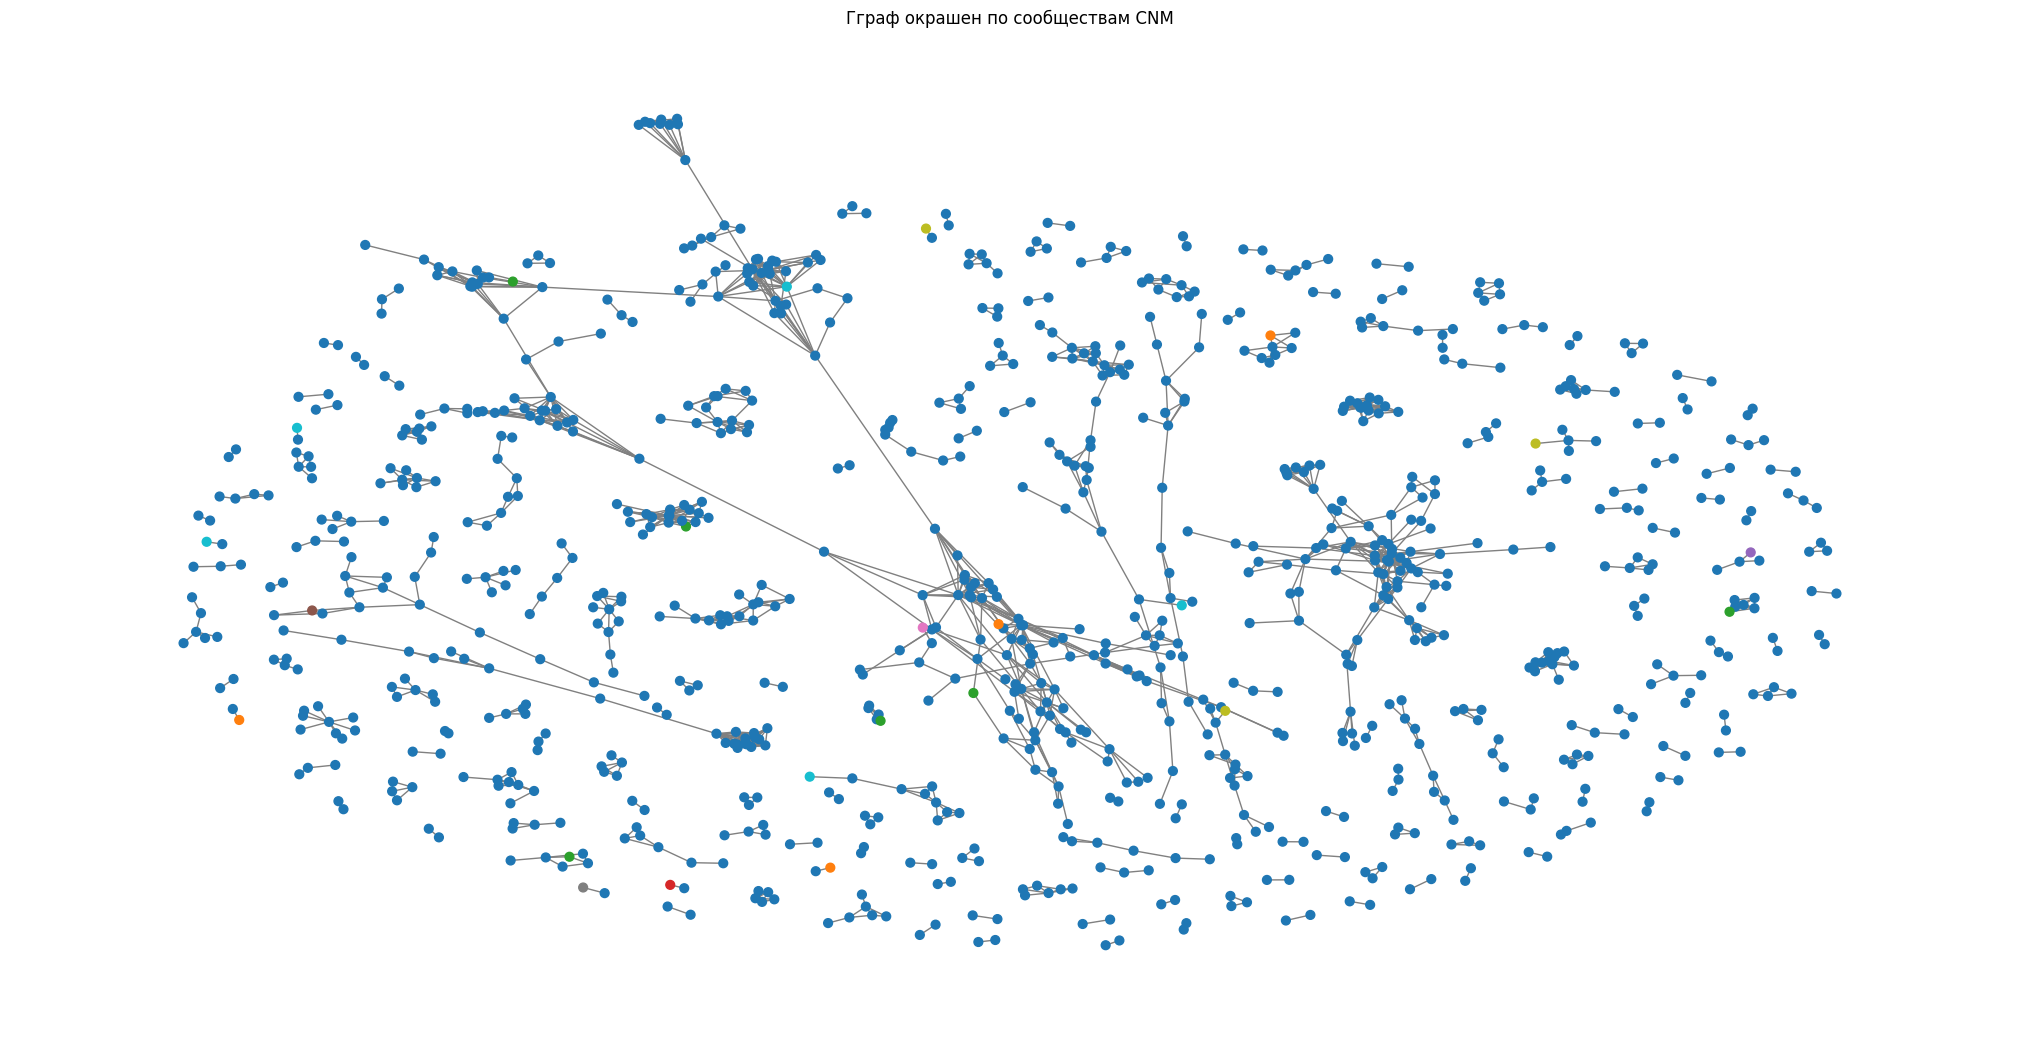

In [ ]:
plt.figure(figsize=(20, 10))
sub_nodes = list(G.nodes)[:1000]
H = G.subgraph(sub_nodes)

# создаём отображение: node -> community_id
node2comm = {}
for i, comm in enumerate(nx_comms):
    for n in comm:
        node2comm[n] = i

colors = [node2comm.get(n, 0) for n in H.nodes()]
nx.draw(H, node_color=colors, node_size=40, edge_color="gray", with_labels=False, cmap="tab10")
plt.title("Гграф окрашен по сообществам CNM")
plt.show()